# Multivariate polynomial regression 

Because our linear regression model could predict house prices with negative sale prices, we decided to try polynomial regression. 

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle

# import the data 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_data_submission = pd.read_csv('sample_submission.csv')

#### Visualize the train and test data

C:\Users\gwyne\anaconda3\envs\progLab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gwyne\anaconda3\envs\progLab\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

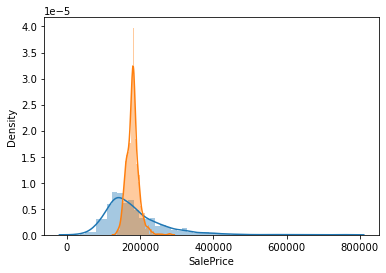

In [126]:
# select the Sale price from the training data = y 
y_train = train_data['SalePrice']

# select the Sale price from the test data = y 
y_test = test_data_submission['SalePrice']

# create histogram with seaborn of the Sale price (y) from train and test data
sns.distplot(y_train)
sns.distplot(y_test)

## Prepare data

Because it has been discovered that the test data is distributed very differently than the training data, we are going to redivide the data set. In addition, we will make some adjustments in the data set in order to make the data useful as input to the model.

1. Merge train and test data set
1. One hot encode the categorical data
2. Clean data
    - Replace missing numerical data with the mean value of that feature
    - Replace missing categorical data with the most common category of that feature)
3. Ramdomly devide merged data set into 70% train data and 30% test data

In [127]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def cleaning(dataframe):
    """
    This function corrects any missing values in a pandas dataframe
    returns the cleaned dataframe
    """
    
    # loop through all the features/columns in the training data
    for column in dataframe:

        # check whether the data in each column is numerical
        if is_numeric_dtype(dataframe[column]):

            # if the data is numerical compute the mean of the whole column values
            column_mean = dataframe[column].mean()

            # replace the missing values in this column with the mean of the column
            dataframe[column] = dataframe[column].fillna(column_mean)

        # also replace categorical missing values
        # check this approach!
        else:
            dataframe[column] = dataframe[column].fillna(dataframe[column].value_counts().index[0])
    
    return dataframe

#### Redivide the dataset

In [128]:
from sklearn.model_selection import train_test_split

def shuffle_data(train_data_df, test_data_df, test_data_submission_df):
    """
    Function to randomly shuffle the train and test data
    """
    # drop the house Id, as this is already in the test_data_df
    test_data_submission_df = test_data_submission_df.drop('Id', axis=1)

    # add the saleprice (y) to the test data
    test_data_df.insert(80, "SalePrice", test_data_submission_df, True)

    # 'glue' the test data and train data together
    merged_df = pd.concat([train_data_df, test_data_df], ignore_index=True)
    
    # clean data in dataframe
    total_df = cleaning(merged_df)
        
    return total_df
    
# compute the total shuffled dataframe
total_df = shuffle_data(train_data, test_data, test_data_submission)


# Garage cars

As we did with the linear regression model, we created a polynomial model for the top 3 features which correlated the most with the sale price; GagarageCars, GrLivArea, OverallQual. 

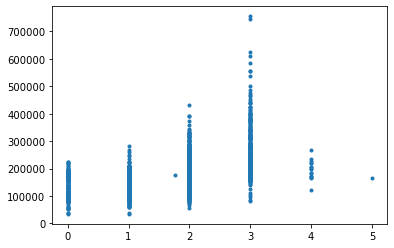

In [129]:
import matplotlib.pyplot as plt# select only GarageCars
train_cars = total_df[["GarageCars", "SalePrice"]].sort_values(by=["GarageCars"])

# select x and y, keep same shape
X_train = train_cars.iloc[:, 0:1].values
y_train = train_cars.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()

from sklearn.preprocessing import MinMaxScaler



In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

# transform X to polynomial 
poly_train = PolynomialFeatures(degree=3)
poly_train_features = poly_train.fit_transform(X_train)

# split data in test and train
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(poly_train_features, y_train, test_size=0.3, random_state=42)

# create model
cars_model = LinearRegression()

# train the model
cars_model.fit(X_train_cars, y_train_cars)

# predict y 
y_cars_predicted = cars_model.predict(X_test_cars)

# compute error of the model with RMSE and RMSLE
cars_rmse = np.sqrt(mean_squared_error(y_test_cars, y_cars_predicted))
print("RMSE:", cars_rmse)

cars_rmsle = np.sqrt(mean_squared_log_error(y_test_cars, y_cars_predicted))
print("RMSLE:", cars_rmsle)

RMSE: 55183.38122692956
RMSLE: 0.24902052632930183


# Overall quality

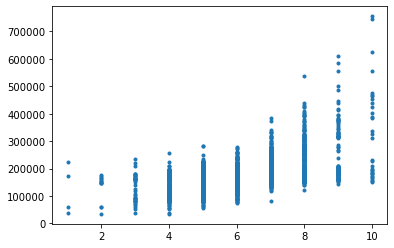

In [131]:
# select only GarageCars
train_qual = total_df[["OverallQual", "SalePrice"]].sort_values(by=["OverallQual"])

# select x and y, keep same shape
X_train = train_qual.iloc[:, 0:1].values
y_train = train_qual.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()

In [132]:
# transform X in polynomial 
poly_train_qual = PolynomialFeatures(degree=3)
poly_train_features_qual = poly_train_qual.fit_transform(X_train)

# select test and train
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(poly_train_features_qual, y_train, test_size=0.3, random_state=42)

# compute the model
qual_model = LinearRegression()

# train the model
qual_model.fit(X_train_qual, y_train_qual)

# predict y 
y_qual_predicted = qual_model.predict(X_test_qual)

# compute error of the model RMSE and RMSLE
qual_rmse = np.sqrt(mean_squared_error(y_test_qual, y_qual_predicted))
print("RMSE:", qual_rmse)

qual_rmsle = np.sqrt(mean_squared_log_error(y_test_qual, y_qual_predicted))
print("RMSLE:", qual_rmsle)

RMSE: 46087.867348838074
RMSLE: 0.2260025846987532


# GrLivArea

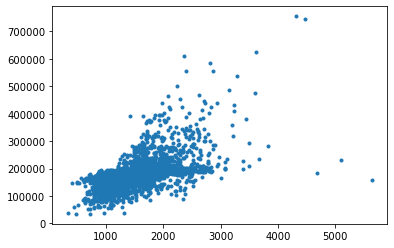

In [133]:
# select only GrLivArea
train_area = total_df[["GrLivArea", "SalePrice"]].sort_values(by=["GrLivArea"])

# select x and y, keep same shape
X_train = train_area.iloc[:, 0:1].values
y_train = train_area.iloc[:, 1:2].values

# plot data
plt.plot(X_train, y_train, ".")
plt.show()


In [134]:
# transform X in polynomidal
poly_train_area = PolynomialFeatures(degree=3)
poly_train_features_area = poly_train_area.fit_transform(X_train)

# split data in test and train
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(poly_train_features_area, y_train, test_size=0.3, random_state=42)

# create model
area_model = LinearRegression()

# train model
area_model.fit(X_train_area, y_train_area)

# predict y 
y_area_predicted = area_model.predict(X_test_area)

# compute error of the model RMSE and RMSLE
area_rmse = np.sqrt(mean_squared_error(y_test_area, y_area_predicted))
print("RMSE:", area_rmse)

area_rmsle = np.sqrt(mean_squared_log_error(y_test_area, y_area_predicted))
print("RMSLE:", area_rmsle)

RMSE: 50961.011641784775
RMSLE: 0.23609160780755595


The RMSE of all three features were:
- GrLivArea: RMSE = 50,961
- OverallQual: RMSE = 46,088
- GarageCars: RMSE = 55,183

The RSME values were all between 40.000 and 50.000. These values are in a similar range as the univariate linear models.

# Multivariate polynomial regression 

The next step was to create a polynomial regression model for multiple features to see if adding more features to our model would improve the performance of the model. 

We created two models, the first one with the three features from above combined: GrLivArea, OverallQual and GarageCars.

In [135]:
# select top 3 features
top_3 = total_df[["GrLivArea", "OverallQual", "GarageCars", "SalePrice"]]

# split data in X and y
X3, y3 = top_3[["GrLivArea", "OverallQual", "GarageCars"]], top_3["SalePrice"]

In [136]:
# transform X into polynomial 
poly3 = PolynomialFeatures(degree=3)
poly3_features = poly3.fit_transform(X3)

# split data in test and train 
X3_train, X3_test, y3_train, y3_test = train_test_split(poly3_features, y3, test_size=0.3, random_state=42)

# scale the training data
scaler3 = MinMaxScaler()

# scale the train data
X3_train = scaler3.fit_transform(X3_train)

# apply same scale on test data
X3_test = scaler3.transform(X3_test)

In [137]:
# create the model 
multi_poly3 = LinearRegression()

# train the model
multi_poly3.fit(X3_train, y3_train)

# predict y 
y3_predicted = multi_poly3.predict(X3_test)

# compute error of the model with RMSE and RMSLE
poly3_rmse = np.sqrt(mean_squared_error(y3_test, y3_predicted))
print("RMSE:", poly3_rmse)

poly3_rmsle = np.sqrt(mean_squared_log_error(y3_test, y3_predicted))
print("RMSLE:", poly3_rmsle)

RMSE: 44512.34284709058
RMSLE: 0.2428517566015189


Adding all three features to our polynomial model did not decrease the RMSE of our model

# Polynomial regression: correct data

In the previous model we decided to merge the given train and test data and redivide it in order to get a more normal distribution of the data. After a while, we realized that test data is not intended to be used in training a model. Contrary to our expectations, the submission data was not the sales price of the test data, but it is a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms (which still contains information).


Therefore, the models created in the cells above are briefly repeated on the correct data. 


### Univariate polynomial model: GarageCars

In [138]:
# import the train data
train_data = pd.read_csv('train.csv')

# clean data from missing values
train_data = cleaning(train_data)

# select only GarageCars
train_cars = train_data[["GarageCars", "SalePrice"]].sort_values(by=["GarageCars"])

# select x and y, keep same shape
X_train = train_cars.iloc[:, 0:1].values
y_train = train_cars.iloc[:, 1:2].values


# compute the model
# transform X to polynomial 
poly_train = PolynomialFeatures(degree=3)
poly_train_features = poly_train.fit_transform(X_train)

# split data in test and train
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(poly_train_features, y_train, test_size=0.3, random_state=42)

# create model
cars_model = LinearRegression()

# train the model
cars_model.fit(X_train_cars, y_train_cars)

# predict y 
y_cars_predicted = cars_model.predict(X_test_cars)

# compute error of the model with RMSE and RMSLE
cars_rmse = np.sqrt(mean_squared_error(y_test_cars, y_cars_predicted))
print("RMSE:", cars_rmse)

cars_rmsle = np.sqrt(mean_squared_log_error(y_test_cars, y_cars_predicted))
print("RMSLE:", cars_rmsle)



RMSE: 57244.87133387005
RMSLE: 0.2933545123711488


### Univariate polynomial model: OverallQual

In [142]:
# select only GarageCars
train_qual = train_data[["OverallQual", "SalePrice"]].sort_values(by=["OverallQual"])

# select x and y, keep same shape
X_train = train_qual.iloc[:, 0:1].values
y_train = train_qual.iloc[:, 1:2].values

# transform X in polynomial 
poly_train_qual = PolynomialFeatures(degree=3)
poly_train_features_qual = poly_train_qual.fit_transform(X_train)

# select test and train
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(poly_train_features_qual, y_train, test_size=0.3, random_state=42)

# compute the model
qual_model = LinearRegression()

# train the model
qual_model.fit(X_train_qual, y_train_qual)

# predict y 
y_qual_predicted = qual_model.predict(X_test_qual)

# compute error of the model RMSE and RMSLE
qual_rmse = np.sqrt(mean_squared_error(y_test_qual, y_qual_predicted))
print("RMSE:", qual_rmse)

qual_rmsle = np.sqrt(mean_squared_log_error(y_test_qual, y_qual_predicted))
print("RMSLE:", qual_rmsle)

RMSE: 39145.500245969044
RMSLE: 0.21695003749058472


### Univariate polynomial model: GrLivArea

In [140]:
# select only GrLivArea
train_area = train_data[["GrLivArea", "SalePrice"]].sort_values(by=["GrLivArea"])

# select x and y, keep same shape
X_train = train_area.iloc[:, 0:1].values
y_train = train_area.iloc[:, 1:2].values

# transform X in polynomidal
poly_train_area = PolynomialFeatures(degree=3)
poly_train_features_area = poly_train_area.fit_transform(X_train)

# split data in test and train
X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(poly_train_features_area, y_train, test_size=0.3, random_state=42)

# create model
area_model = LinearRegression()

# train model
area_model.fit(X_train_area, y_train_area)

# predict y 
y_area_predicted = area_model.predict(X_test_area)

# compute error of the model RMSE and RMSLE
area_rmse = np.sqrt(mean_squared_error(y_test_area, y_area_predicted))
print("RMSE:", area_rmse)

area_rmsle = np.sqrt(mean_squared_log_error(y_test_area, y_area_predicted))
print("RMSLE:", area_rmsle)

RMSE: 52485.01336569829
RMSLE: 0.26326723748316033


### Multivariate polynomial model: GarageCars, OverallQual & GrLivArea

In [141]:
# select top 3 features
top_3 = train_data[["GrLivArea", "OverallQual", "GarageCars", "SalePrice"]]

# split data in X and y
X3, y3 = train_data[["GrLivArea", "OverallQual", "GarageCars"]], top_3["SalePrice"]

# transform X into polynomial 
poly3 = PolynomialFeatures(degree=3)
poly3_features = poly3.fit_transform(X3)

# split data in test and train 
X3_train, X3_test, y3_train, y3_test = train_test_split(poly3_features, y3, test_size=0.3, random_state=42)

# scale the training data
scaler3 = MinMaxScaler()

# scale the train data
X3_train = scaler3.fit_transform(X3_train)

# apply same scale on test data
X3_test = scaler3.transform(X3_test)

# create the model 
multi_poly3 = LinearRegression()

# train the model
multi_poly3.fit(X3_train, y3_train)

# predict y 
y3_predicted = multi_poly3.predict(X3_test)

# compute error of the model with RMSE and RMSLE
poly3_rmse = np.sqrt(mean_squared_error(y3_test, y3_predicted))
print("RMSE:", poly3_rmse)

poly3_rmsle = np.sqrt(mean_squared_log_error(y3_test, y3_predicted))
print("RMSLE:", poly3_rmsle)

RMSE: 34838.577240752995
RMSLE: 0.21878112227266272


## Summary

WRONG data univarita RMSE:
- GarageCars: RMSE = 55,183
- OverallQual: RMSE = 46,088
- GrLivArea: RMSE = 50,961

WRONG data multivariate RMSE:
- GarageCars, OverallQual & GrLivArea: RMSE = 44,512



CORRECT data univarita RMSE:
- GarageCars: RMSE = 57,245
- OverallQual: RMSE = 39,146
- GrLivArea: RMSE = 52,485

CORRECT data multivariate RMSE:
- GarageCars, OverallQual & GrLivArea: RMSE = 34,839


The RMSE values of the correct data seem slightly better, but still not as low as we would have hoped. Therefore, in the next step we will implement a completely different model; Random Regressor Trees. 

